In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
data = pd.read_csv('sales_data.csv')

In [29]:
def calc_missing_values(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    return pd.DataFrame({'Count': missing_count, 'Percent': missing_percent})

print(calc_missing_values(data))

                  Count  Percent
store_id              0      0.0
customer_id           0      0.0
product_id            0      0.0
product_category      0      0.0
date                  0      0.0
amount                0      0.0
single_price          0      0.0
transaction_id        0      0.0


In [30]:
data['date'] = pd.to_datetime(data['date'])
def extract_datetime_features(df, date_column):
    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day
    df['hour'] = df[date_column].dt.hour
    df['dayofyear'] = df[date_column].dt.dayofyear
    df['weekofyear'] = df[date_column].dt.isocalendar().week
    df['weekday'] = df[date_column].dt.weekday
    df['quarter'] = df[date_column].dt.quarter
    return df

data = extract_datetime_features(data, 'date')

In [33]:
def plot_3d_sales(df, x_col, y_col, z_col, value_col, title, xlabel, ylabel, zlabel, show_z_axis=True):
    grouped = df.groupby([x_col, y_col] + ([z_col] if show_z_axis else []))[value_col].sum().reset_index()

    x_unique = grouped[x_col].unique()
    y_unique = grouped[y_col].unique()
    z_unique = grouped[z_col].unique() if show_z_axis else [0]

    x_dict = {val: i for i, val in enumerate(x_unique)}
    y_dict = {val: i for i, val in enumerate(y_unique)}
    z_dict = {val: i for i, val in enumerate(z_unique)}

    grouped['x'] = grouped[x_col].map(x_dict)
    grouped['y'] = grouped[y_col].map(y_dict)
    grouped['z'] = grouped[z_col].map(z_dict) if show_z_axis else 0

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for _, row in grouped.iterrows():
        ax.bar3d(row['x'], row['y'], row['z'], 
                 dx=0.5, dy=0.5, dz=row[value_col],
                 color='purple', alpha=0.7)

    ax.set_xticks(range(len(x_unique)))
    ax.set_xticklabels(x_unique, rotation=45)
    ax.set_yticks(range(len(y_unique)))
    ax.set_yticklabels(y_unique)
    if show_z_axis:
        ax.set_zticks(range(len(z_unique)))
        ax.set_zticklabels(z_unique)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)

    plt.show()


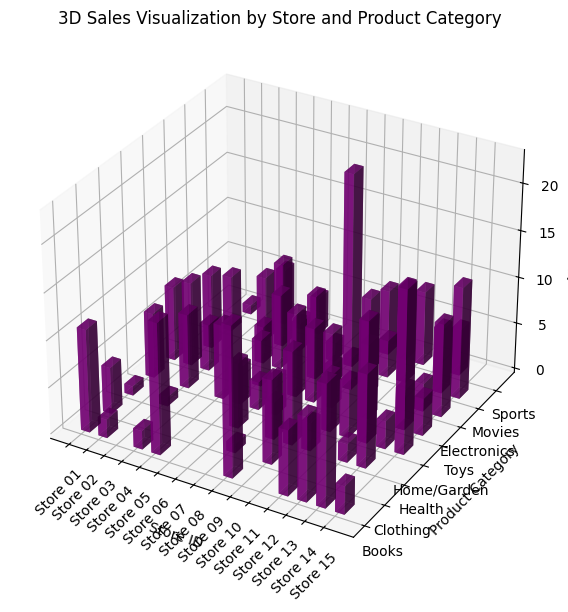

In [34]:

plot_3d_sales(data, 'store_id', 'product_category', None, 'amount',
              "3D Sales Visualization by Store and Product Category",
              "Store ID", "Product Category", "Amount", show_z_axis=False)

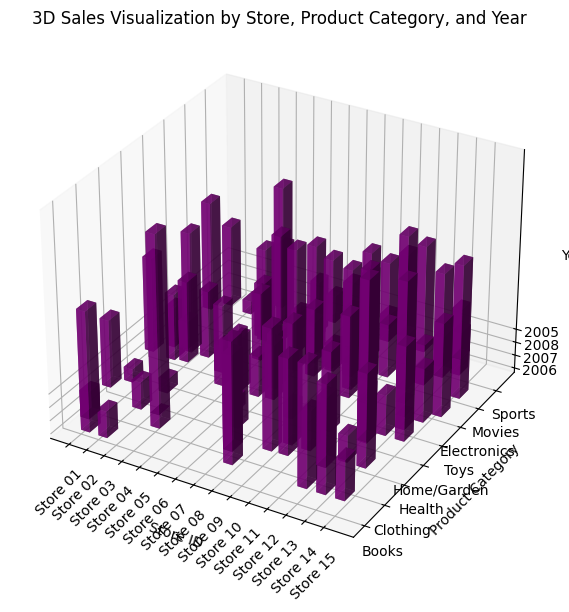

In [35]:
plot_3d_sales(data, 'store_id', 'product_category', 'year', 'amount',
              "3D Sales Visualization by Store, Product Category, and Year",
              "Store ID", "Product Category", "Year", show_z_axis=True)